In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ff = pd.read_csv('WA_Marketing-Campaign.csv')
ff.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
ff.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


Obseved number of unique stores in each promotion.

In [5]:
ff.groupby('Promotion')['LocationID'].nunique()

Promotion
1    43
2    47
3    47
Name: LocationID, dtype: int64

Promotion 1 has the lowest unique stores among promotions. However, Number of locations in each promotion seem equal.

Obseved revenue in each promotion in percent.

In [6]:
ff.groupby('Promotion')['SalesInThousands'].sum()/ff['SalesInThousands'].sum()*100

Promotion
1    34.106510
2    30.368901
3    35.524590
Name: SalesInThousands, dtype: float64

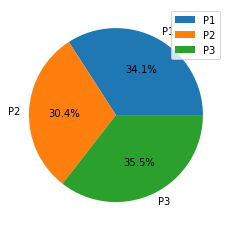

In [7]:
%matplotlib inline
plt.pie(ff.groupby('Promotion')['SalesInThousands'].sum()/ff['SalesInThousands'].sum()*100,labels = ['P1','P2','P3'],autopct = '%1.1f%%')
plt.legend()

Each promotion group takes roughly **one third** of the total sales during the promotion weeks.

In [8]:
ff.groupby(['Promotion', 'MarketSize'])['LocationID'].nunique()/ff.groupby('Promotion')['LocationID'].nunique()*100

Promotion  MarketSize
1          Large         32.558140
           Medium        55.813953
           Small         11.627907
2          Large         34.042553
           Medium        57.446809
           Small          8.510638
3          Large         25.531915
           Medium        61.702128
           Small         12.765957
Name: LocationID, dtype: float64

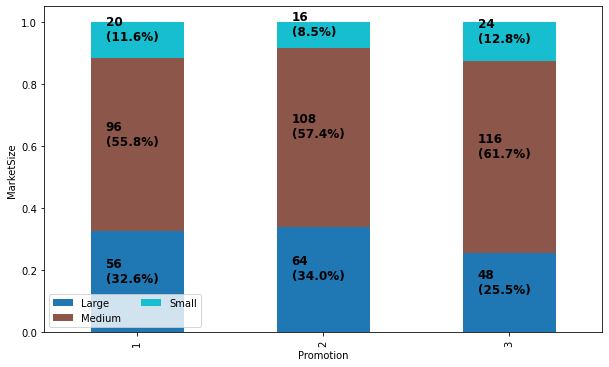

In [9]:
cross_tab_prop = pd.crosstab(index=ff['Promotion'],
                             columns=ff['MarketSize'],
                             normalize="index")
cross_tab = pd.crosstab(index=ff['Promotion'],
                             columns=ff['MarketSize'])
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Promotion")
plt.ylabel("MarketSize")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

Medium Marketsize has the most number of stores in every promotion. (Same distribution)

Explore the AgeOfStore column

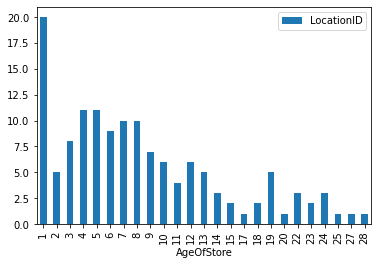

In [10]:
z = ff.groupby('AgeOfStore')['LocationID'].nunique()
z = pd.DataFrame(z)
z.plot.bar()

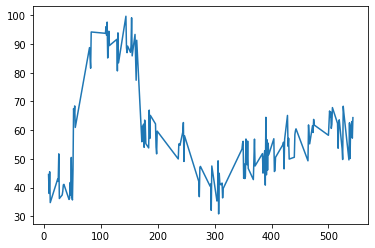

In [35]:
ff[ff['Promotion'] == 1]['SalesInThousands'].plot()

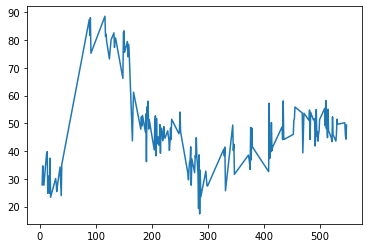

In [32]:
ff[ff['Promotion'] == 2]['SalesInThousands'].plot()

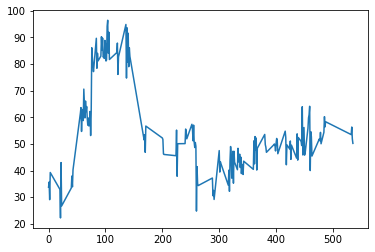

In [33]:
ff[ff['Promotion'] == 3]['SalesInThousands'].plot()

In [11]:
ff.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


The majority of stores are **10 years old or less**. A large number of stores are **1** year old. \
We see that all three groups seem to have store age profiles. The average ages (Mean) of stores for the three groups are 8-9 years old and the majority of the stores are **10-12 years old or younger**.\
After exploring the distribution of the variables in the three promotion groups, I can verify that the sample groups are similar and the A/B testing results will be meaningful and trustworthy.

**Hypothesis Testing**\
To achieve this goal, we have to check the difference of average revenue of each promotion by using AVOVA.\
Assumption of ANOVA 
1. The responses for each factor level have a normal population distribution. **We use QQplot to check normal population(n > 50)**
2. These distributions have the same variance. **We use box plot or Bartlett’s Test**
3. The data are independent **This dataset is independent because each store has only 1 promotion at that moment of time.**

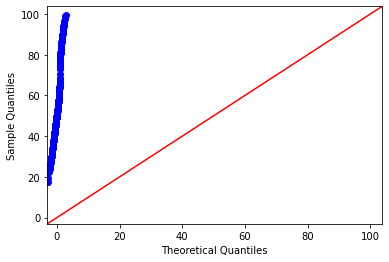

In [12]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(ff['SalesInThousands'], line ='45')
py.show()

Dataset seems not normally distributed. then, we plot by each promotion.

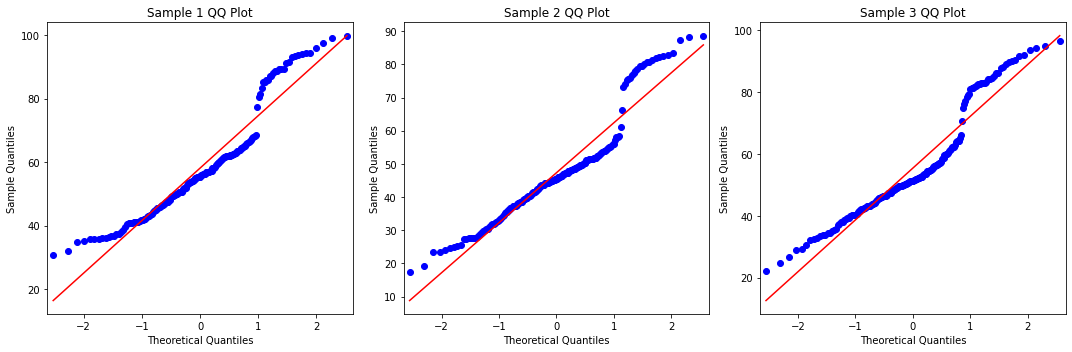

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate example data (replace this with your actual data)
sample1 = ff[ff['Promotion'] == 1]['SalesInThousands']
sample2 = ff[ff['Promotion'] == 2]['SalesInThousands']
sample3 = ff[ff['Promotion'] == 3]['SalesInThousands']

# Create QQ plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sm.qqplot(sample1, line='s', ax=axes[0])
axes[0].set_title('Sample 1 QQ Plot')
sm.qqplot(sample2, line='s', ax=axes[1])
axes[1].set_title('Sample 2 QQ Plot')
sm.qqplot(sample3, line='s', ax=axes[2])
axes[2].set_title('Sample 3 QQ Plot')

plt.tight_layout()
plt.show()

There is evident that our dataset violate the ANOVA's assumption. To make sure, we use Shapiro-Wilk test. \
H0 :  the variable is normally distributed. \
Ha : the variable is not normally distributed \
at significant level 5%

In [19]:
from scipy.stats import shapiro
shapiro(ff['SalesInThousands'])

ShapiroResult(statistic=0.9346455335617065, pvalue=9.384886192286522e-15)

Conclude, this dataset is **not normal distribution**. So we should use non-parametic test **Kruskal-Wallis Test** instead of ANOVA. \
H0 : the population median of all of the groups are equal. \
Ha : the population median of all of the groups are not equal. \
at significant level 5%

In [21]:
from scipy.stats import kruskal
kw_statistic, kw_p_value = kruskal(sample1, sample2, sample3)
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_p_value)

Kruskal-Wallis Test:
Statistic: 53.29475169322799
p-value: 2.6741866266697816e-12


Reject null hypothesis so that at least one population median of one group is different from the population median of at least one other group.

In [ ]:
We compare each promotion. Start with promotion 1 and 2.